In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib nbagg

In [4]:
import Act_Temp_quick

In [4]:
import sys

In [6]:
import scipy.interpolate as sci

In [7]:
alpha_theory_examples = [0.51, 0.54, 0.57, 0.6, 0.64, 0.65, 0.68, 0.72, 0.75]

In [8]:
plt.close()

case1 = []
case2 = []
case3 = []
case4 = []
case5 = []
case6 = []

for alpha in alpha_theory_examples:
    output1 = Act_Temp_quick.theory(alpha, 1000, 1000)
    output2 = Act_Temp_quick.theory(alpha, 2000, 1000)
    output3 = Act_Temp_quick.theory(alpha, 1000, 2000)
    output4 = Act_Temp_quick.theory(alpha, 2000, 2000)
    output5 = Act_Temp_quick.theory(alpha, 1000, 4000)
    output6 = Act_Temp_quick.theory(alpha, 4000, 1000)
    
    if output1[4] > 10:
        case1.append(output1[5])
    else:
        case1.append(None)

    if output2[4] > 10:
        case2.append(output2[5])
    else:
        case2.append(None)
    
    if output3[4] > 10:
        case3.append(output3[5])
    else:
        case3.append(None)
        
    if output4[4] > 10:
        case4.append(output4[5])
    else:
        case4.append(None)
                
    if output5[4] > 10:
        case5.append(output5[5])
    else:
        case5.append(None)
    
    if output6[4] > 10:
        case6.append(output6[5])
    else:
        case6.append(None)

/home/jupyter/TRIUMF-2019-Summer/2-3-4 Potential - Main Project/Act_Temp_quick.py:233: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_latent_at_N = field_energy_density_at_N/radiation_energy_density_at_N


<IPython.core.display.Javascript object>


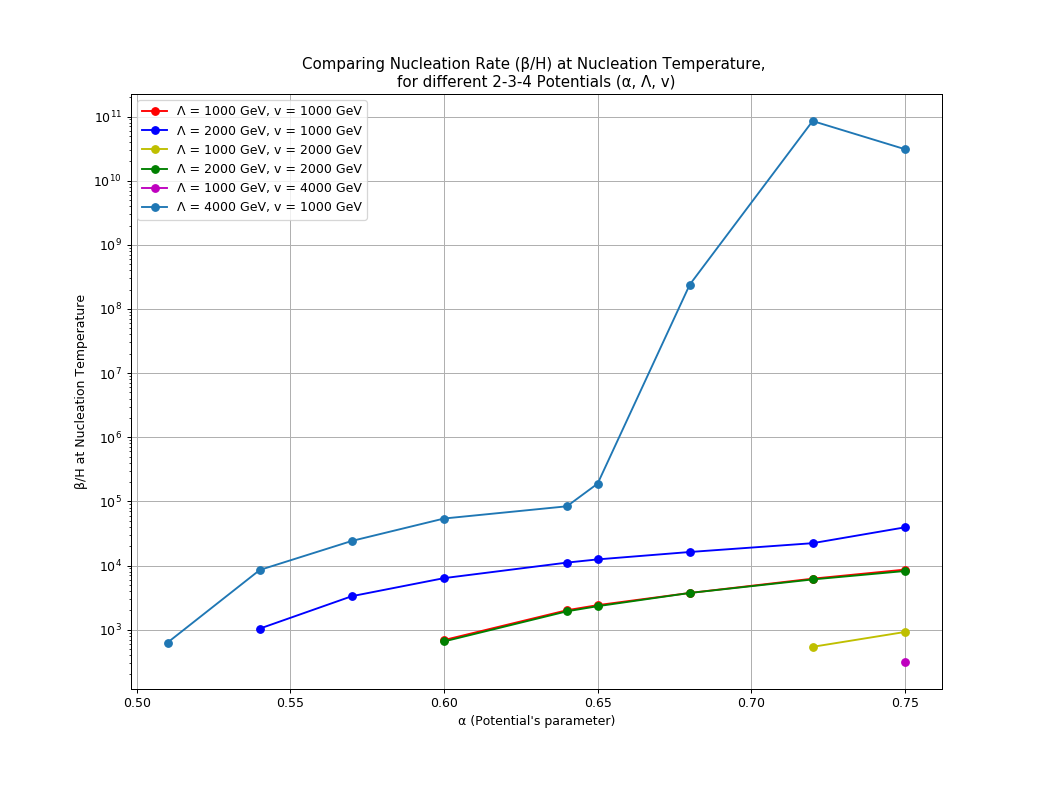

In [9]:
plt.close()

plt.semilogy(alpha_theory_examples, case1, 'ro-', label="\u039B = 1000 GeV, v = 1000 GeV")
plt.semilogy(alpha_theory_examples, case2, 'bo-', label="\u039B = 2000 GeV, v = 1000 GeV")
plt.semilogy(alpha_theory_examples, case3, 'yo-', label="\u039B = 1000 GeV, v = 2000 GeV")
plt.semilogy(alpha_theory_examples, case4, 'go-', label="\u039B = 2000 GeV, v = 2000 GeV")
plt.semilogy(alpha_theory_examples, case5, 'mo-', label="\u039B = 1000 GeV, v = 4000 GeV")
plt.semilogy(alpha_theory_examples, case6, 'o-', label="\u039B = 4000 GeV, v = 1000 GeV")
plt.xlabel("\u03B1 (Potential's parameter)")
plt.ylabel("\u03B2/H at Nucleation Temperature")
plt.title("Comparing Nucleation Rate (\u03B2/H) at Nucleation Temperature, \nfor different 2-3-4 Potentials (\u03B1, \u039B, v)")
plt.grid(True)
plt.legend()

In [10]:
plt.close()

In [11]:
a_data_template = []    
s_data_dof_3 = []
s_data_dof_4 = []
r_data_dof_3 = []
r_data_dof_4 = []

file2 = open("S_alpha_template_alpha_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        a_data_template.append(float(word2))
file2.close()

file2 = open("S_alpha_template_dof_3_S_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        s_data_dof_3.append(float(word2))
file2.close()

file2 = open("S_alpha_template_dof_4_S_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        s_data_dof_4.append(float(word2))
file2.close()

file2 = open("S_alpha_template_dof_3_R_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        r_data_dof_3.append(float(word2))
file2.close()

file2 = open("S_alpha_template_dof_4_R_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        r_data_dof_4.append(float(word2))
file2.close()

a_data_template_3 = a_data_template
a_data_template_4 = a_data_template

In [12]:
######
# Want to use best guess Pchip -> not just linearization
a_data_template = np.array(a_data_template)

compare1 = list(abs(a_data_template - 0.506))
find_index1 = compare1.index(min(compare1))
if a_data_template[find_index1] > 0.506:
    find_index1 = find_index1 + 1

compare2 = list(abs(a_data_template - 0.513))
find_index2 = compare2.index(min(compare2))
if a_data_template[find_index2] < 0.513:
    find_index2 = find_index2 - 1

compare3 = list(abs(a_data_template - 0.522))
find_index4 = compare3.index(min(compare3))
if a_data_template[find_index4] < 0.522:
    find_index4 = find_index4 - 1

a1_3 = list(a_data_template)[:(find_index2 + 1)]
a2_3 = list(a_data_template)[find_index1:] 
a3_3 = list(a_data_template)[(find_index2 + 1):find_index1]

a1_4 = list(a_data_template)[:(find_index4 + 1)]
a2_4 = list(a_data_template)[find_index1:] 
a3_4 = list(a_data_template)[(find_index4 + 1):find_index1]

s3_vals = list(s_data_dof_3[:len(a1_3)])
for y in s_data_dof_3[find_index1:]:
    s3_vals.append(y)
s_data_dof_3 = np.array(s3_vals)

r3_vals = list(r_data_dof_3[:len(a1_3)])
for y in r_data_dof_3[find_index1:]:
    r3_vals.append(y)
r_data_dof_3 = np.array(r3_vals)

a3_vals = a1_3[:]
for x in a2_3:
    a3_vals.append(x)
a_data_template_3 = np.array(a3_vals)

s4_vals = list(s_data_dof_4[:len(a1_4)])
for y in s_data_dof_4[find_index1:]:
    s4_vals.append(y)
s_data_dof_4 = np.array(s4_vals)

r4_vals = list(r_data_dof_4[:len(a1_4)])
for y in r_data_dof_4[find_index1:]:
    r4_vals.append(y)
r_data_dof_4 = np.array(r4_vals)

a4_vals = a1_4[:]
for x in a2_4:
    a4_vals.append(x)
a_data_template_4 = np.array(a4_vals)

# Get rid of above code if just want to use linearization
######
alpha_eff_array = np.linspace(0.5, 0.75, 10000)

curve_fit_S_4 = sci.PchipInterpolator(a_data_template_4[::-1], s_data_dof_4[::-1])
curve_fit_R_4 = sci.PchipInterpolator(a_data_template_4[::-1], r_data_dof_4[::-1])

curve_fit_S_3 = sci.PchipInterpolator(a_data_template_3[::-1], s_data_dof_3[::-1])
curve_fit_R_3 = sci.PchipInterpolator(a_data_template_3[::-1], r_data_dof_3[::-1])

S_array_3 = curve_fit_S_3(alpha_eff_array)
R_array_3 = curve_fit_R_3(alpha_eff_array)

S_array_4 = curve_fit_S_4(alpha_eff_array)
R_array_4 = curve_fit_R_4(alpha_eff_array)

<IPython.core.display.Javascript object>


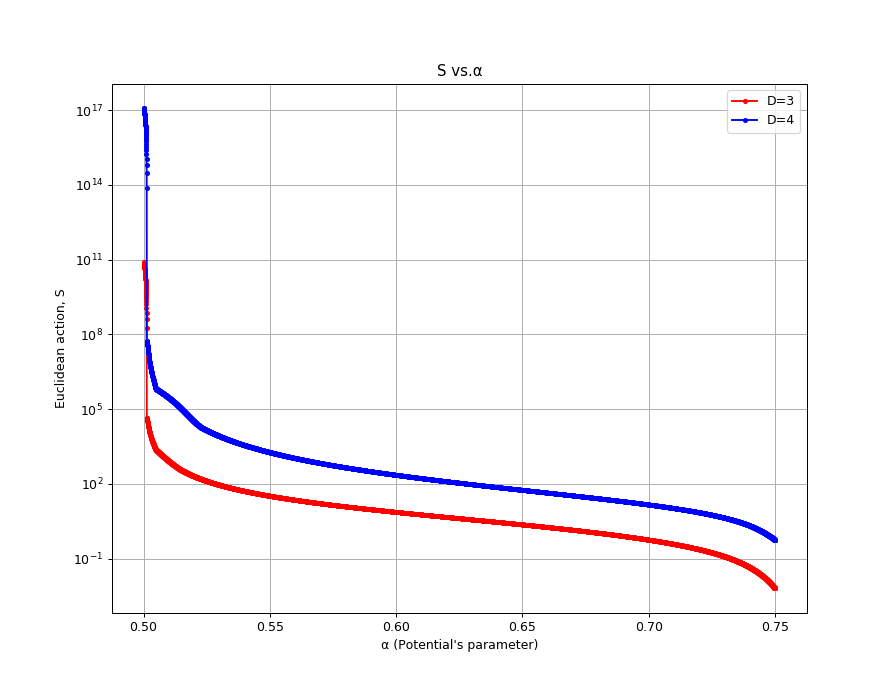

In [20]:
plt.close()

plt.semilogy(alpha_eff_array, S_array_3, 'r.-', label='D=3')
plt.semilogy(alpha_eff_array, S_array_4, 'b.-', label='D=4')
plt.xlabel("\u03B1 (Potential's parameter)")
plt.ylabel("Euclidean action, S")
plt.title("S vs.\u03B1")
#plt.xlim(0.49, 0.53)
plt.grid(True)
plt.legend()

In [21]:
plt.close()

<IPython.core.display.Javascript object>


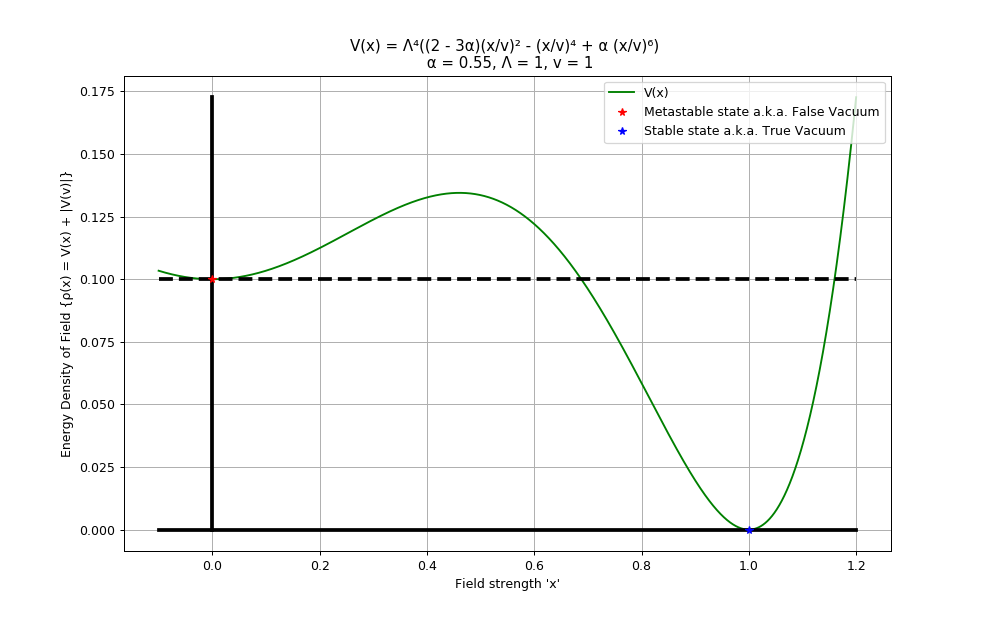

In [30]:
plt.close()

V = lambda x: (2 - 3*0.55)*x**2 - x**4 + 0.55*x**6
x_array = np.linspace(-0.1, 1.2, 10000)

plt.figure(figsize=[11, 7])
plt.plot(x_array, V(x_array) - V(1), 'g-', label='V(x)')
plt.plot([-0.1, 1.2], [0, 0], 'k-', linewidth=3)
plt.plot([-0.1, 1.2], [-1*V(1), -1*V(1)], 'k--', linewidth=3)
plt.plot([0, 0], [0, V(1.2) - V(1)], 'k-', linewidth=3)
plt.plot(0, -1*V(1), 'r*', label='Metastable state a.k.a. False Vacuum')
plt.plot(1, 0, 'b*', label='Stable state a.k.a. True Vacuum')
plt.xlabel("Field strength 'x'")
plt.ylabel("Energy Density of Field {\u03C1(x) = V(x) + |V(v)|}")
plt.title("V(x) = \u039B\u2074((2 - 3\u03B1)(x/v)\u00B2 - (x/v)\u2074 + \u03B1 (x/v)\u2076) \n \u03B1 = 0.55, \u039B = 1, v = 1")
plt.grid(True)
plt.legend(loc=1)

In [31]:
plt.close()